In [45]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold, datasets
from sklearn.metrics.pairwise import euclidean_distances

In [46]:
df = pd.read_csv('cars_clus.csv')
print(df.shape)
df.head()

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [47]:
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [48]:
# Data Cleaning
df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
print('Data size: ', df.shape)

Data size:  (117, 16)


In [49]:
# Add L/100km to dataset
df['lkm'] = 236.25/df['mpg'].values.astype(float)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,lkm
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636


In [50]:
# Choose features to use
features = ['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'lkm']
features_df = df[features]
features_df.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,lkm
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,8.437500
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,9.450000
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,10.738636
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,8.750000
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,10.738636


In [51]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
x = features_df.values
mms = MinMaxScaler()
f_mat = mms.fit_transform(x)
f_mat[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.30357143],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.4       ],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.52272727],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.33333333],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.52272727]])

In [52]:
# calculate distance matrix
dist_mat = euclidean_distances(f_mat, f_mat)
dist_mat[0:5]

array([[0.        , 0.57716401, 0.75985917, 0.21234366, 0.77807786,
        1.05214268, 0.36864339, 0.56063625, 0.60227022, 0.72659681,
        0.89010805, 0.75796943, 1.02545761, 0.96950703, 0.64196012,
        0.1700495 , 0.40236409, 0.61797062, 0.63402818, 0.6749361 ,
        0.94342023, 0.18119047, 0.65317946, 0.3761137 , 0.44153822,
        0.78925206, 0.35991209, 0.86702434, 0.43793949, 0.3508555 ,
        0.41253231, 1.46811688, 1.69801451, 1.47035784, 1.58128211,
        1.09820694, 0.79243859, 0.13324917, 0.54849909, 0.29120842,
        0.60896643, 1.12755609, 0.83203105, 1.09735588, 1.47915656,
        0.66606554, 1.607411  , 0.18412548, 0.3767957 , 0.2768567 ,
        0.73534255, 1.00490133, 0.26224616, 0.08146223, 0.42144793,
        0.57343894, 0.68844956, 0.60506908, 0.79967006, 0.55043151,
        0.65543642, 0.93084072, 0.98525073, 1.19645129, 0.16845131,
        0.24485662, 0.31048106, 0.6358769 , 0.57590842, 0.98068798,
        0.56754838, 0.25073154, 0.29629627, 0.62

In [53]:
# Hierarchical Clustering
z = hierarchy.linkage(dist_mat, method='complete')

C:\Users\AMIRH~1.DAL\AppData\Local\Temp/ipykernel_68/1859975538.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_mat, method='complete')


In [54]:
# Leaf label function
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

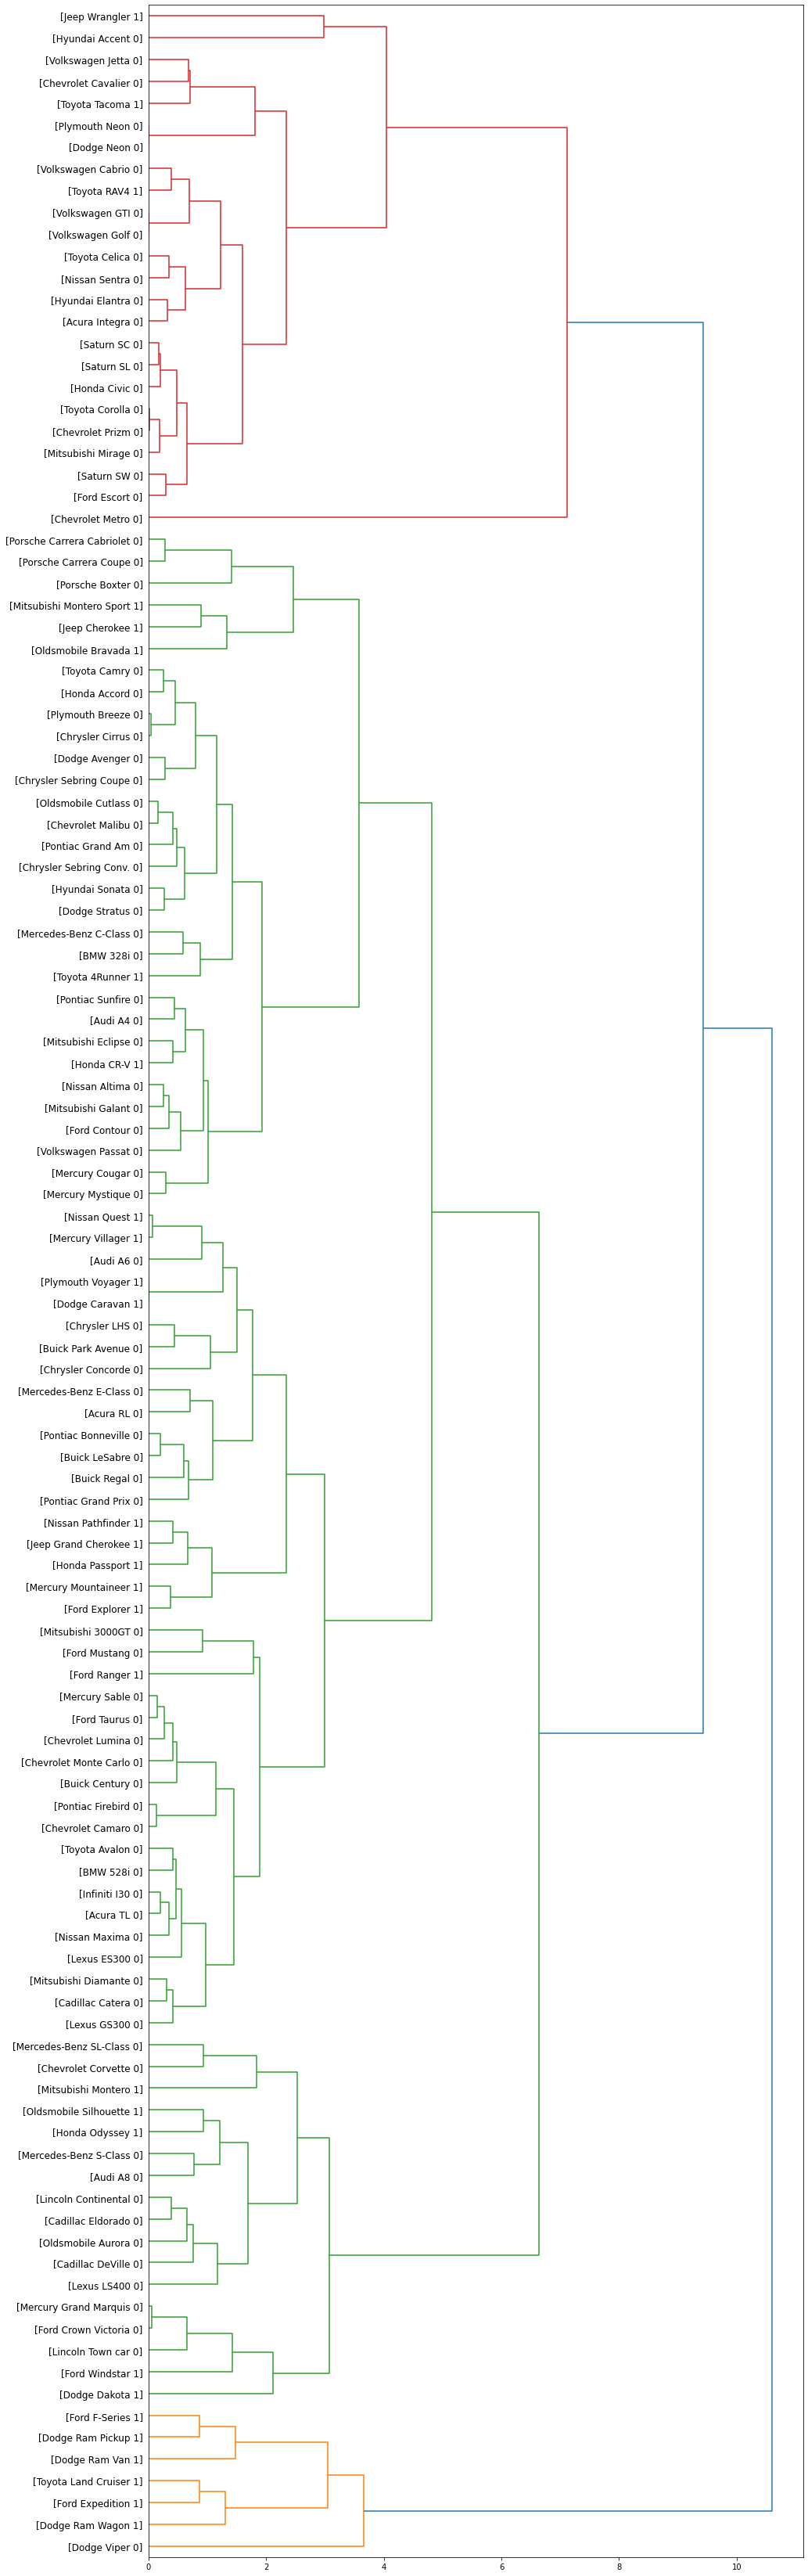

In [55]:
# Dendrogram
fig = pl.figure(figsize=(15,60))
dendro = hierarchy.dendrogram(z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')


In [56]:
# Agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(dist_mat)
agglom.labels_

C:\Users\Amirh.Dallalan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 5, 5, 2, 5, 4, 2, 5, 5, 5, 5, 5, 4, 4, 5, 0, 2, 5, 5, 5, 4, 0,
       3, 2, 2, 5, 2, 5, 0, 2, 2, 1, 1, 1, 1, 4, 5, 0, 5, 2, 5, 4, 5, 4,
       1, 5, 1, 0, 2, 2, 5, 4, 0, 0, 2, 5, 0, 2, 5, 5, 5, 4, 4, 4, 0, 2,
       2, 5, 5, 4, 2, 2, 2, 5, 4, 5, 5, 2, 5, 4, 4, 0, 2, 5, 5, 5, 2, 4,
       2, 4, 0, 2, 5, 2, 2, 5, 5, 5, 2, 2, 2, 0, 0, 0, 0, 2, 5, 0, 0, 0,
       2, 1, 0, 0, 2, 0, 0], dtype=int64)

In [57]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,lkm,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,5
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,5
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,2
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

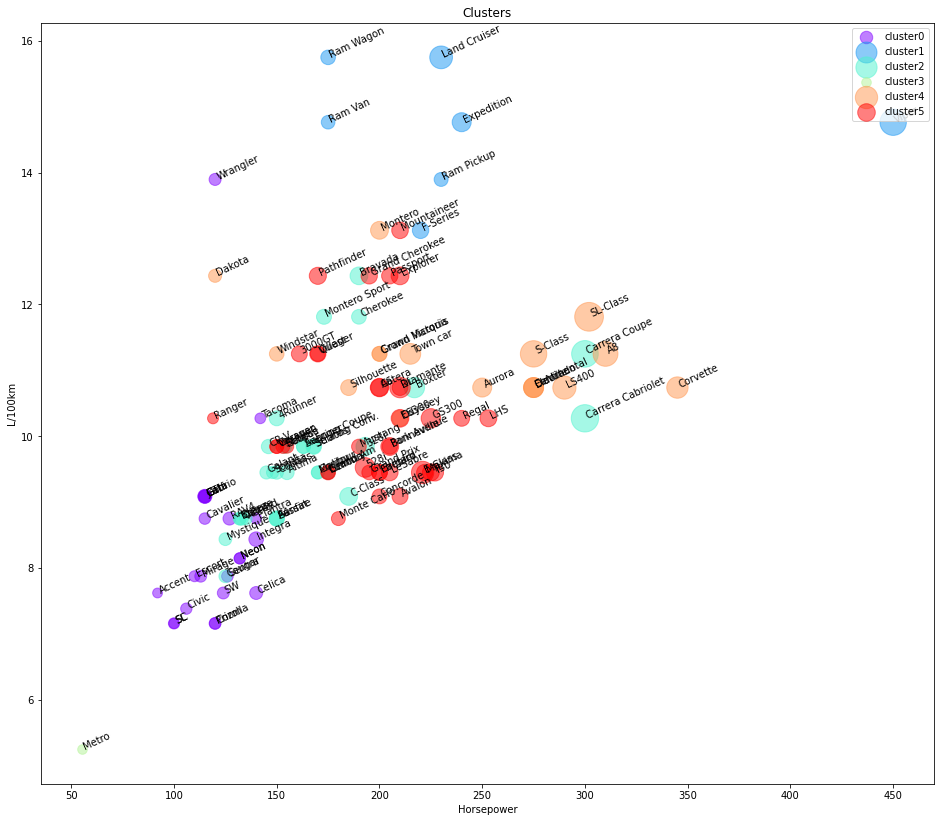

In [58]:
# Plot clusters
import matplotlib.cm as cm
n_cluster = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_cluster))
cluster_labels = list(range(0, n_cluster))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.lkm[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.lkm, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Horsepower')
plt.ylabel('L/100km')
plt.show()


In [59]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     20
          1.0      3
1         0.0      1
          1.0      6
2         0.0     26
          1.0      5
3         0.0      1
4         0.0     12
          1.0      5
5         0.0     28
          1.0     10
Name: cluster_, dtype: int64

In [60]:
agg_cars = df.groupby(['cluster_','type'])['horsepow', 'engine_s', 'lkm', 'price'].mean()
agg_cars

C:\Users\AMIRH~1.DAL\AppData\Local\Temp/ipykernel_68/4088364414.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow', 'engine_s', 'lkm', 'price'].mean()


horsepow  engine_s        lkm      price
cluster_ type                                            
0        0.0   118.500000  1.890000   8.054192  14.226100
         1.0   129.666667  2.300000  10.972933  14.292000
1        0.0   450.000000  8.000000  14.765625  69.725000
         1.0   211.666667  4.483333  14.675551  29.024667
2        0.0   167.538462  2.492308   9.389304  24.785231
         1.0   169.800000  3.200000  11.234940  23.716600
3        0.0    55.000000  1.000000   5.250000   9.235000
4        0.0   267.666667  4.566667  11.041193  46.417417
         1.0   173.000000  3.180000  11.563917  24.308400
5        0.0   201.607143  3.292857   9.837841  27.668429
         1.0   174.900000  3.240000  11.532108  24.165800

**Cars**:

*   Cluster 1: with almost high mpg, and low in horsepower.

*   Cluster 2: with good mpg and horsepower, but higher price than average.

*   Cluster 3: with low mpg, high horsepower, highest price.

**Trucks**:

*   Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
*   Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
*   Cluster 3: with good mpg and horsepower, low price.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'L/100km')

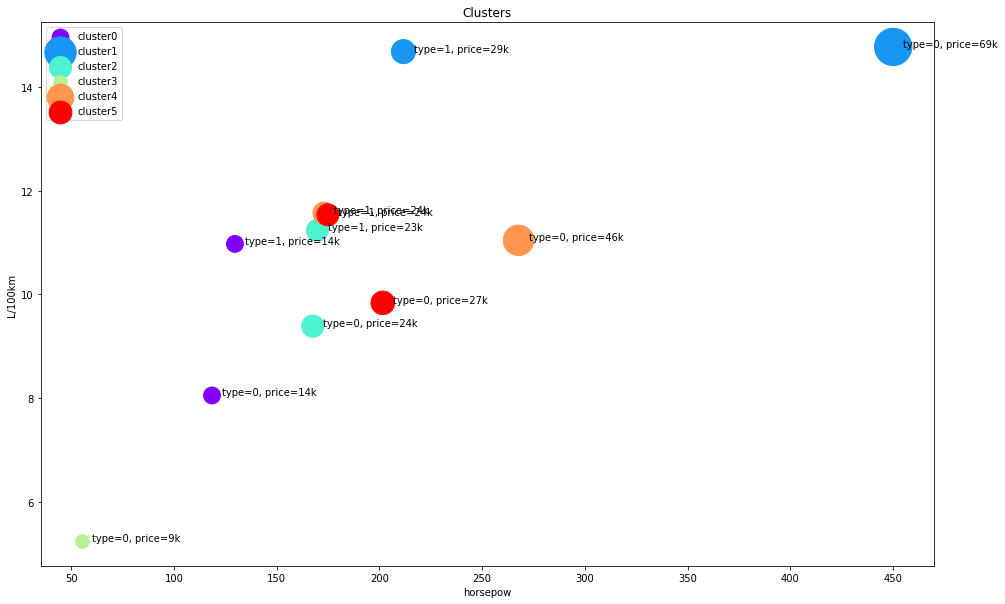

In [61]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.lkm, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('L/100km')
